In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as n


# Load Excel file
file_path = 'DSP Cow Lactation History-8_14_2024.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the specified sheet
df = pd.read_excel(excel_data, sheet_name='DSP Cow Lactation History-8_14_')

# Drop columns with too many missing values for correlation analysis
df_cleaned = df.drop(columns=['Birthday', 'Production', 'Reproduction'])
print(df_cleaned.dtypes)

# Fill remaining NaN values with the median of each column
df_cleaned = df_cleaned.fillna(df_cleaned.median)
print(df_cleaned.isna().sum())  # Check if there are any remaining NaN values.


Cow Number                           int64
Lac Days                             int64
Lactation No                         int64
Total Amount Feed                  float64
Day Production Avg                 float64
Lactose Indication                 float64
Milk - Fat kg                      float64
Milk - Protein kg                  float64
Avg Number Of Milkings             float64
Average Milk Speed                 float64
Fat indication %                   float64
Lactose indication %               float64
Protein indication                 float64
Predicted Production (305 days)    float64
dtype: object
Cow Number                         0
Lac Days                           0
Lactation No                       0
Total Amount Feed                  0
Day Production Avg                 0
Lactose Indication                 0
Milk - Fat kg                      0
Milk - Protein kg                  0
Avg Number Of Milkings             0
Average Milk Speed                 0
Fat indication

In [2]:
# Check the data types of each column in the dataframe
print(df_cleaned.dtypes)

# Identify non-numeric columns
non_numeric_columns = df_cleaned.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns:", non_numeric_columns)
# Attempt to convert these columns to numeric types, setting any conversion failures to NaN
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')

# Check again for any remaining NaN values
print(df_cleaned.isna().sum())

# Fill NaN values with the median
df_cleaned = df_cleaned.fillna(df_cleaned.median())

# Recalculate the correlation matrix
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)



Cow Number                          int64
Lac Days                            int64
Lactation No                        int64
Total Amount Feed                  object
Day Production Avg                 object
Lactose Indication                 object
Milk - Fat kg                      object
Milk - Protein kg                  object
Avg Number Of Milkings             object
Average Milk Speed                 object
Fat indication %                   object
Lactose indication %               object
Protein indication                 object
Predicted Production (305 days)    object
dtype: object
Non-numeric columns: Index(['Total Amount Feed', 'Day Production Avg', 'Lactose Indication',
       'Milk - Fat kg', 'Milk - Protein kg', 'Avg Number Of Milkings',
       'Average Milk Speed', 'Fat indication %', 'Lactose indication %',
       'Protein indication', 'Predicted Production (305 days)'],
      dtype='object')
Cow Number                            0
Lac Days                          

In [3]:
# Attempt to convert these columns to numeric types, setting any conversion failures to NaN
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')

# Check again for any remaining NaN values
print(df_cleaned.isna().sum())

# Fill NaN values with the median
df_cleaned = df_cleaned.fillna(df_cleaned.median())

# Recalculate the correlation matrix
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)
# Drop columns with a large number of NaN values
df_cleaned = df_cleaned.drop(columns=['Lactose Indication', 'Lactose indication %'])

# Alternatively, fill NaN values with the median or another appropriate value
df_cleaned = df_cleaned.fillna(df_cleaned.median())

# Recalculate the correlation matrix
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)



Cow Number                            0
Lac Days                              0
Lactation No                          0
Total Amount Feed                     0
Day Production Avg                    0
Lactose Indication                 1979
Milk - Fat kg                         0
Milk - Protein kg                     0
Avg Number Of Milkings                0
Average Milk Speed                    0
Fat indication %                      0
Lactose indication %               1979
Protein indication                    0
Predicted Production (305 days)       0
dtype: int64
                                 Cow Number  Lac Days  Lactation No  \
Cow Number                         1.000000 -0.140237      0.065671   
Lac Days                          -0.140237  1.000000     -0.166968   
Lactation No                       0.065671 -0.166968      1.000000   
Total Amount Feed                 -0.063434 -0.018096      0.344695   
Day Production Avg                -0.061137 -0.037510      0.194341   
L

In [4]:
pip install --upgrade seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


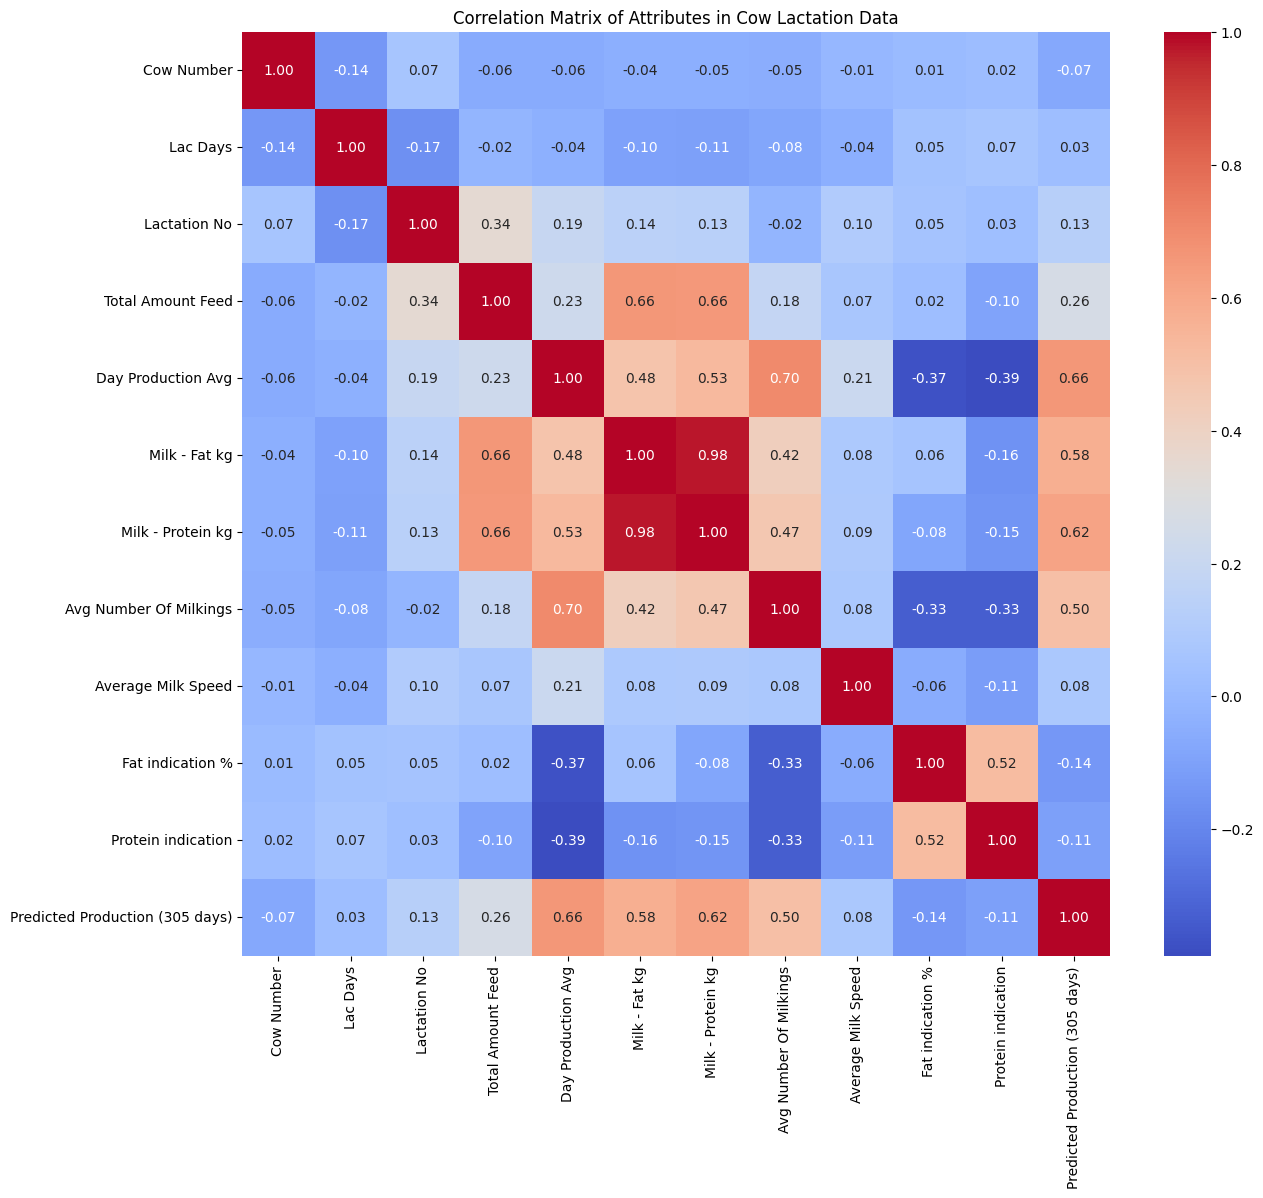

In [5]:

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=False, linewidths=0)
plt.title('Correlation Matrix of Attributes in Cow Lactation Data')
plt.show()

This heatmap reveals that some data correlations are too weak, making the chart appear overly cluttered and filled with a lot of irrelevant information. I will optimize it by removing those attributes with 50% or more missing values.

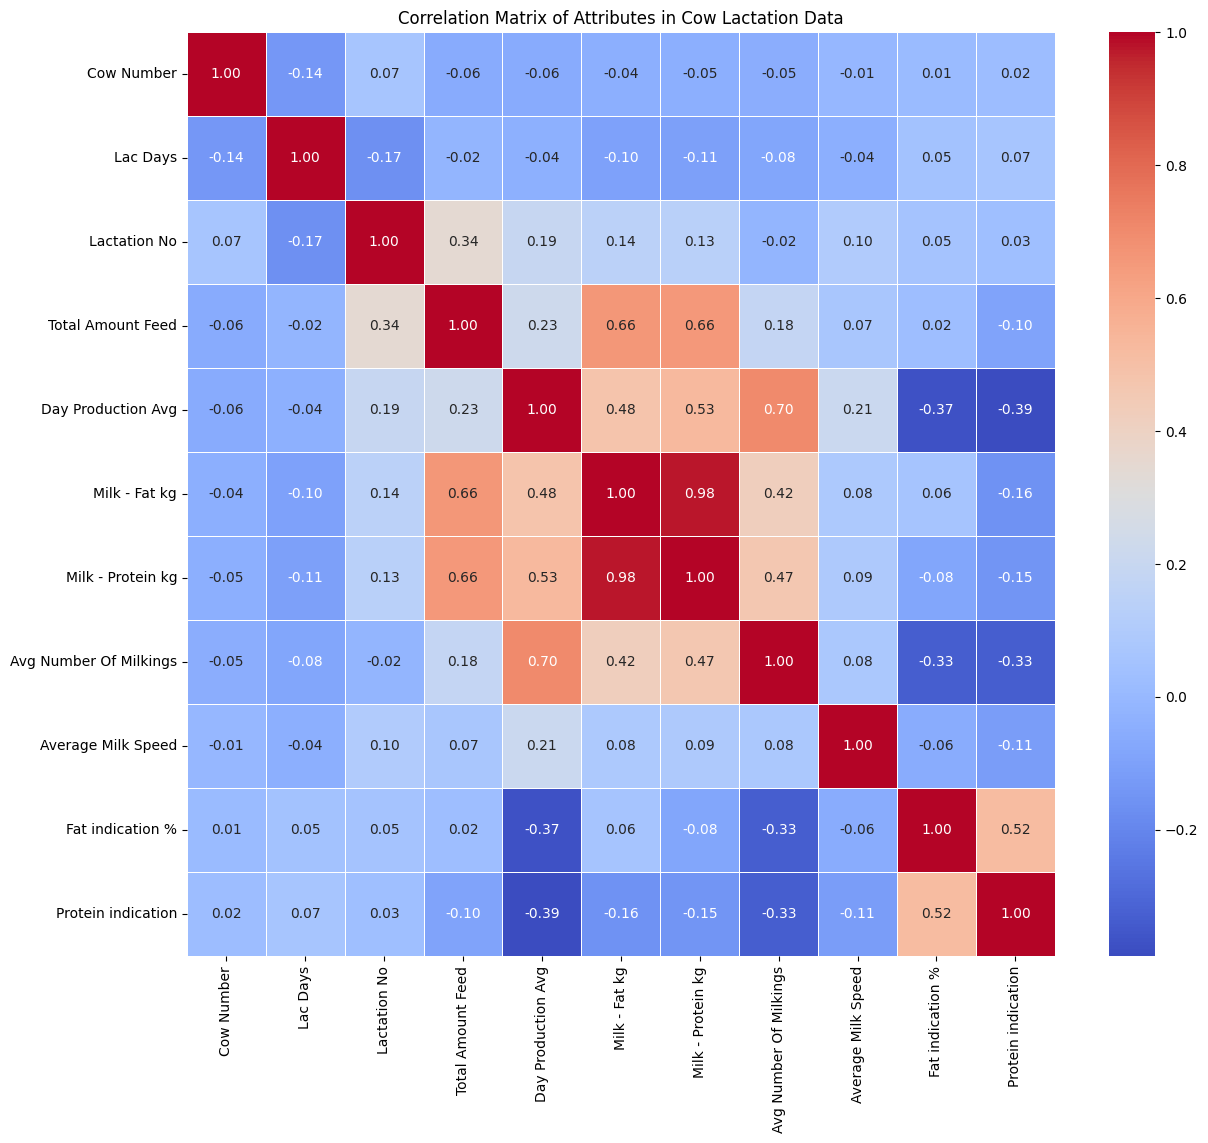

In [6]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 加载Excel文件
# file_path = 'DSP Cow Lactation History-8_14_2024.xlsx'
# df = pd.read_excel(file_path, sheet_name='DSP Cow Lactation History-8_14_')

# 删除非必要的列，并筛选 NaN 值超过50%的列
threshold = 0.5 * len(df)
df_cleaned = df.drop(columns=['Birthday', 'Production', 'Reproduction'])
df_cleaned = df_cleaned.dropna(thresh=threshold, axis=1)

# 将剩余的 object 类型列转换为数值类型
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')

# 用中位数填充剩余的 NaN 值
df_cleaned = df_cleaned.fillna(df_cleaned.median())

# 计算相关矩阵
correlation_matrix = df_cleaned.corr()

# 设置matplotlib图形大小并绘制热力图
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=False, linewidths=0.5)

# 添加标题并显示图表
plt.title('Correlation Matrix of Attributes in Cow Lactation Data')
plt.show()


1. High Correlation:
Milk - Fat kg and Milk - Protein kg: The correlation coefficient between these two variables is nearly 1 (0.98), indicating a very strong positive correlation. This means that when the fat content in milk increases, the protein content almost simultaneously increases as well.
Day Production Avg and Avg Number Of Milkings: The correlation coefficient is 0.70, indicating a strong positive correlation between daily average production and the average number of milkings per day.
Total Amount Feed with Milk - Fat kg and Milk - Protein kg: Both of these variables have a correlation coefficient of 0.66 with the total amount of feed, indicating a strong positive correlation between feed amount and the fat and protein content in milk.

2. Negative Correlation:
Day Production Avg and Fat indication %: There is a noticeable negative correlation (-0.37), suggesting that as daily production increases, the fat percentage in the milk may decrease.
Day Production Avg and Protein indication: There is also a negative correlation (-0.39), indicating that an increase in daily production may lead to a reduction in the protein percentage in the milk.

3. Low Correlation:
Cow Number with Most Other Variables: The correlation is very low, close to 0. This is expected because the cow number is a unique identifier and has no direct relationship with production indicators.
Average Milk Speed with Other Variables: Most of the coefficients related to Average Milk Speed are also low, indicating weak associations between this variable and others.
Conclusion:

I am considering removing these two attributes (Cow Number and Average Milk Speed) in the future analysis since their correlations with other attributes are very low, close to zero, and thus not very relevant. These low correlations add visual complexity to the chart while providing minimal useful information.

In [7]:
# 检查描述统计信息
df_analysis = df_cleaned[['Milk - Fat kg', 'Milk - Protein kg', 'Total Amount Feed', 'Lactation No', 'Avg Number Of Milkings', 'Day Production Avg']]

print(df_analysis.describe())


       Milk - Fat kg  Milk - Protein kg  Total Amount Feed  Lactation No  \
count    1979.000000        1979.000000        1979.000000   1979.000000   
mean      348.916625         289.992420        2554.188479      1.636180   
std       123.043580         100.211987        1405.708911      1.865558   
min         0.000000           0.000000           0.000000      0.000000   
25%       339.500000         285.000000        2208.500000      0.000000   
50%       352.000000         293.000000        2643.000000      1.000000   
75%       360.000000         300.000000        3072.000000      3.000000   
max       868.000000         668.000000        8345.000000      9.000000   

       Avg Number Of Milkings  Day Production Avg  
count             1979.000000         1979.000000  
mean                 2.382163           26.287772  
std                  0.333881            5.384223  
min                  1.000000            0.000000  
25%                  2.400000           26.100000  
50%

In [8]:
# 计算相关系数
corr_fat = df_analysis.corr()['Milk - Fat kg'].sort_values(ascending=False)
corr_protein = df_analysis.corr()['Milk - Protein kg'].sort_values(ascending=False)

print("Correlation with Milk - Fat kg:")
print(corr_fat)
print("\nCorrelation with Milk - Protein kg:")
print(corr_protein)


Correlation with Milk - Fat kg:
Milk - Fat kg             1.000000
Milk - Protein kg         0.975975
Total Amount Feed         0.662139
Day Production Avg        0.480667
Avg Number Of Milkings    0.419202
Lactation No              0.143952
Name: Milk - Fat kg, dtype: float64

Correlation with Milk - Protein kg:
Milk - Protein kg         1.000000
Milk - Fat kg             0.975975
Total Amount Feed         0.657233
Day Production Avg        0.530674
Avg Number Of Milkings    0.466780
Lactation No              0.131317
Name: Milk - Protein kg, dtype: float64


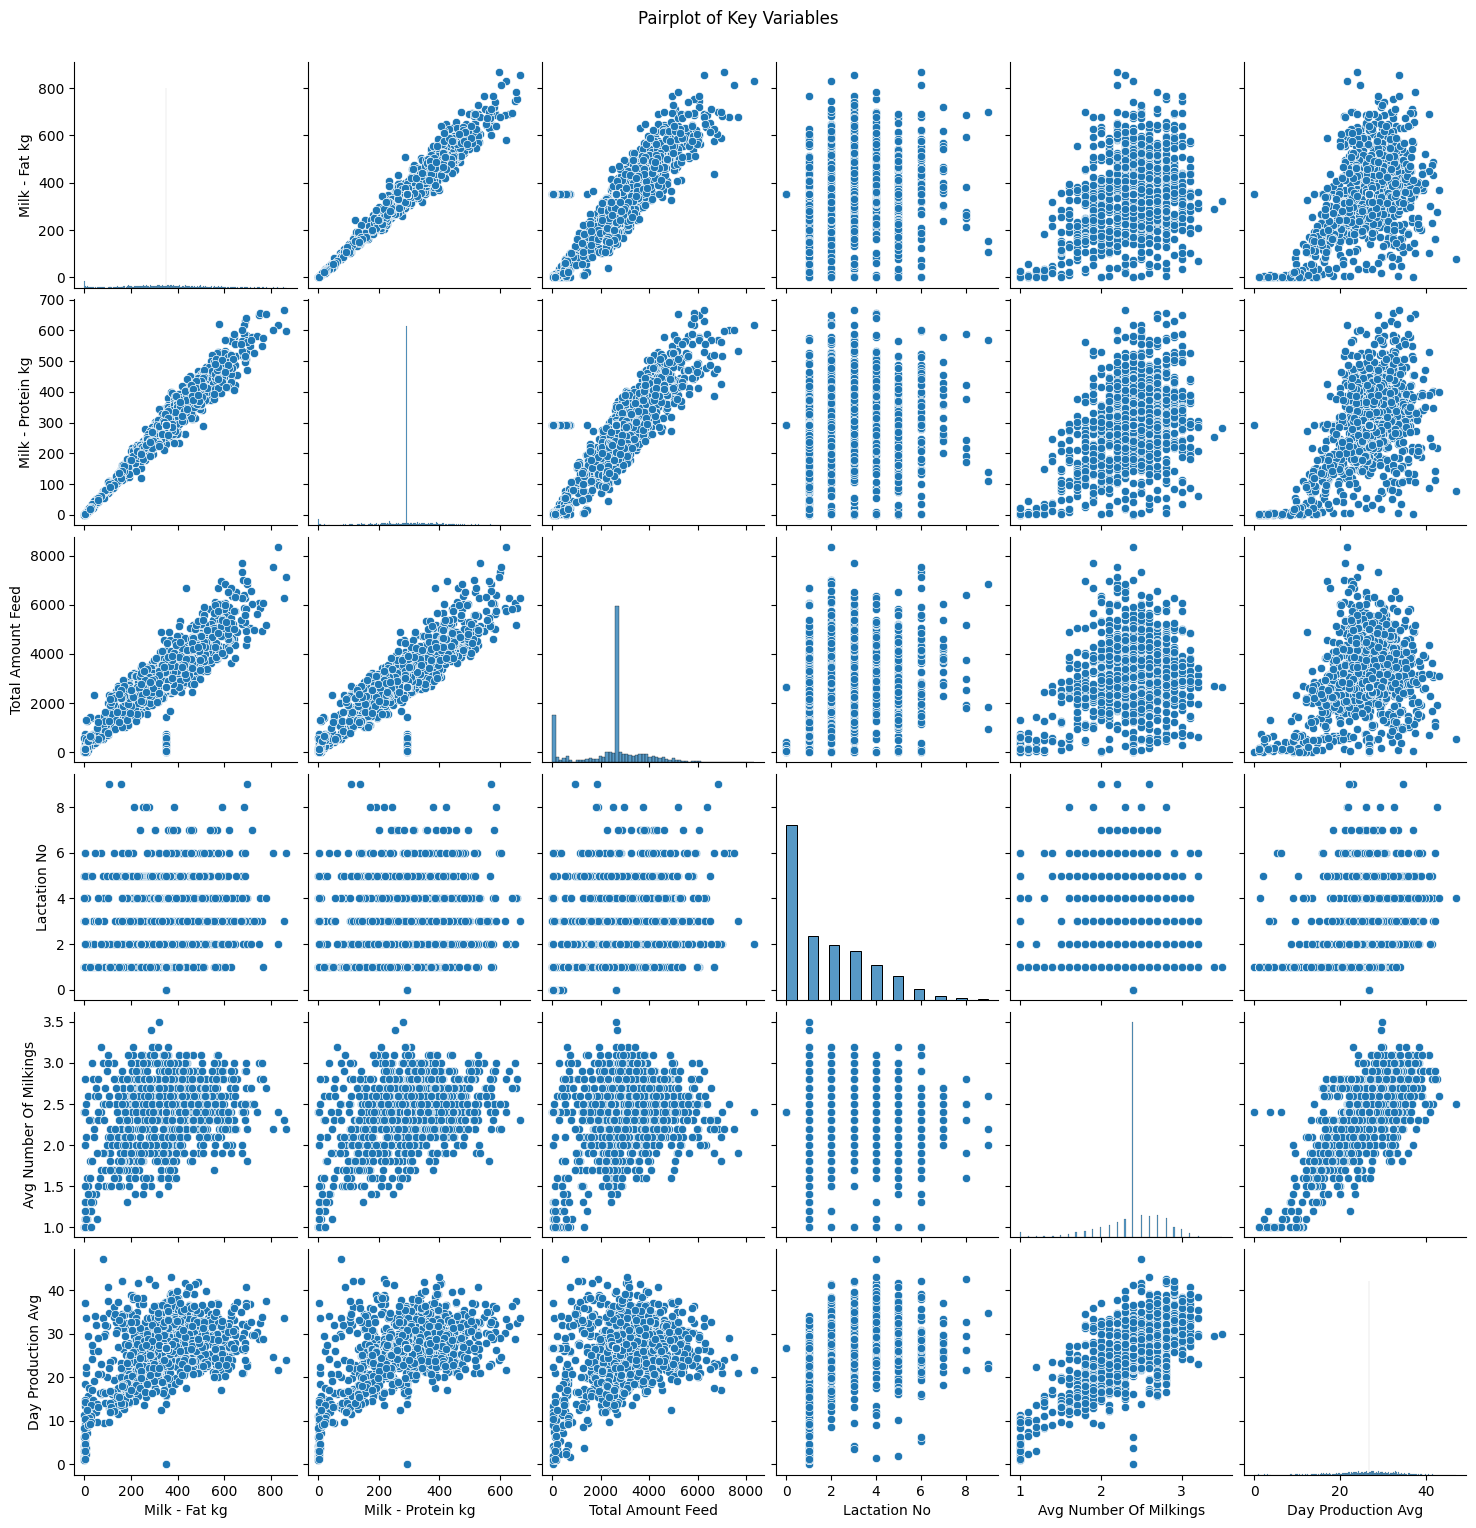

In [9]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# 绘制散点图
sns.pairplot(df_analysis)
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()


Milk - Fat kg and Milk - Protein kg:

The scatter plot shows a nearly perfect linear relationship, indicating a strong positive correlation between these two variables. This aligns with the correlation matrix, suggesting that fat and protein content in milk increase together.
Milk - Fat kg and Milk - Protein kg vs. Total Amount Feed:

Both variables increase with Total Amount Feed, although the relationship is not as strong as between fat and protein content. Feed amount positively impacts milk's fat and protein content.
Milk - Fat kg and Milk - Protein kg vs. Avg Number Of Milkings:

These scatter plots indicate a positive relationship with the average number of milkings, though weaker than the relationship with feed amount.
Day Production Avg:

Shows a positive but dispersed correlation with both Milk - Fat kg and Milk - Protein kg, suggesting that production increases do not always significantly boost fat and protein content.
Lactation No:

The relationship with other variables is weak, indicating that the number of lactations may not significantly impact fat and protein content.
Other Observations:

Some outliers, particularly with Day Production Avg and Lactation No, may need further investigation.
Summary:

Feed amount seems to have the most significant impact on milk's fat and protein content. Weaker relationships are seen with lactation number and daily production. Further analysis, like multiple regression, can help quantify these effects.


In [10]:
import statsmodels.api as sm

# 使用多元回归模型来评估 Total Amount Feed, Lactation No, Avg Number Of Milkings 等变量对 Milk - Fat kg 和
# Milk - Protein kg 的影响。


# 准备数据
X = df_analysis[['Total Amount Feed', 'Lactation No', 'Avg Number Of Milkings', 'Day Production Avg']]
y_fat = df_analysis['Milk - Fat kg']
y_protein = df_analysis['Milk - Protein kg']

# 添加常量项
X = sm.add_constant(X)

# 拟合回归模型
model_fat = sm.OLS(y_fat, X).fit()
model_protein = sm.OLS(y_protein, X).fit()

# 输出回归结果
print("Regression Results for Milk - Fat kg:")
print(model_fat.summary())
print("\nRegression Results for Milk - Protein kg:")
print(model_protein.summary())


Regression Results for Milk - Fat kg:
                            OLS Regression Results                            
Dep. Variable:          Milk - Fat kg   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     671.3
Date:                Thu, 29 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:51:31   Log-Likelihood:                -11482.
No. Observations:                1979   AIC:                         2.297e+04
Df Residuals:                    1974   BIC:                         2.300e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Total Amount Feed:

In both models, the coefficient for Total Amount Feed is positive and significant, indicating that an increase in feed amount leads to higher fat and protein content in milk.
For Milk - Fat kg: A 1-unit increase in feed results in an average increase of 0.0544 kg of fat.
For Milk - Protein kg: A 1-unit increase in feed results in an average increase of 0.0434 kg of protein.
Lactation No (Number of Lactations):

The coefficient for Lactation No is negative and significant in both models, suggesting that more lactations lead to a decrease in fat and protein content.
For Milk - Fat kg: Each additional lactation decreases fat content by an average of 8.3302 kg.
For Milk - Protein kg: Each additional lactation decreases protein content by an average of 7.6484 kg.
Avg Number Of Milkings:

The coefficient for Avg Number Of Milkings is positive and significant in both models, indicating that more milkings increase fat and protein content.
For Milk - Fat kg: Each additional milking increases fat content by 34.8767 kg.
For Milk - Protein kg: Each additional milking increases protein content by 34.4195 kg.
Day Production Avg:

The coefficient for Day Production Avg is positive and significant in both models, showing that higher daily production increases fat and protein content.
For Milk - Fat kg: A 1-unit increase in daily production increases fat content by 6.8197 kg.
For Milk - Protein kg: A 1-unit increase in daily production increases protein content by 6.3326 kg.
Statistical Significance:

Both models show high F-statistics and P-values of 0.00, indicating that all explanatory variables have a significant impact on milk fat and protein content.
The t-statistics and P-values for each variable are also significant (P < 0.05), confirming their importance in the model.

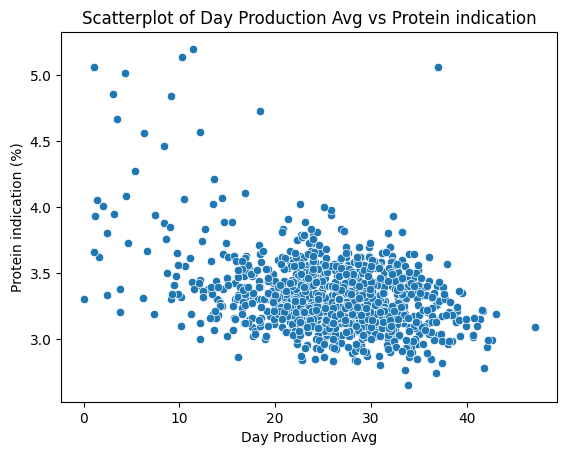

In [11]:
# 绘制散点图
sns.scatterplot(x=df_cleaned['Day Production Avg'], y=df_cleaned['Protein indication'])
plt.title('Scatterplot of Day Production Avg vs Protein indication')
plt.xlabel('Day Production Avg')
plt.ylabel('Protein indication (%)')
plt.show()

In [12]:
# 计算相关系数（计算这两个变量之间的皮尔逊相关系数，以量化它们之间的线性关系。）
correlation = df_cleaned['Day Production Avg'].corr(df_cleaned['Protein indication'])
print(f"Correlation between Day Production Avg and Protein indication: {correlation}")


Correlation between Day Production Avg and Protein indication: -0.3901825267128482


In [13]:
#使用线性回归模型来评估 Day Production Avg 对 Protein indication 的影响，并查看该影响的显著性。
import statsmodels.api as sm

# 准备数据
X = df_cleaned['Day Production Avg'] # Dependent variable
y = df_cleaned['Protein indication'] # Independent variable

# 添加常量项
X = sm.add_constant(X)

# 拟合回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Protein indication   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     355.0
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           5.73e-73
Time:                        14:51:31   Log-Likelihood:                 486.86
No. Observations:                1979   AIC:                            -969.7
Df Residuals:                    1977   BIC:                            -958.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7051      0

Model Overview:

Dependent Variable: Protein indication (protein percentage)
Independent Variable: Day Production Avg (daily average production)
R-squared: 0.152, indicating that the model explains 15.2% of the variation in Protein indication. While the model has some explanatory power, most of the variation remains unexplained, suggesting other factors may be involved.
Model Coefficients:

Intercept (const): 3.7051, which is the expected value of Protein indication when Day Production Avg is zero.
Day Production Avg Coefficient: -0.0149, indicating a negative relationship between daily production and protein percentage. Specifically, for each 1-unit increase in production, protein percentage decreases by 0.0149%.
Statistical Significance:

P-value: The p-value for Day Production Avg is 0.000, well below 0.05, indicating that the relationship is statistically significant.
Limitation:

R-squared: The R-squared value of 0.152 means that the independent variable (Day Production Avg) only explains 15.2% of the variation in the dependent variable (Protein indication). The remaining 84.8% of the variation is unexplained, suggesting other important factors might be missing from the model or that a more complex model is needed.


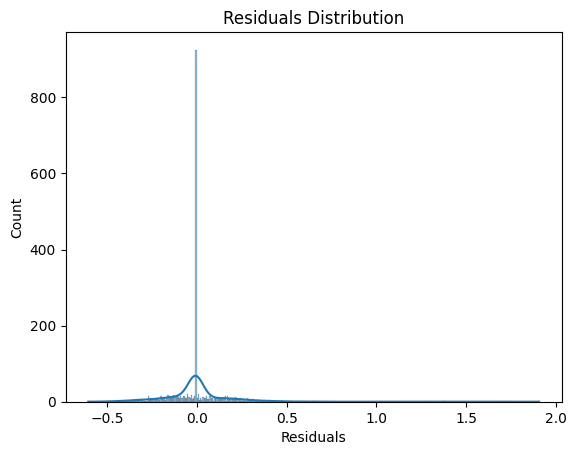

In [14]:
# 绘制残差图
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

This chart shows the distribution of the model's residuals, which are the differences between the actual values and the predicted values. Ideally, residuals should be normally distributed, forming a symmetrical bell-shaped curve.

Observation:

The peak of the distribution is highly concentrated around 0, meaning most residuals are very close to zero. This could be due to certain values in the data being overly concentrated, or the model being very accurate for some data points.
This high concentration near zero might indicate that there are some discrete values or very small prediction errors, but it could also suggest that the model has limited ability to capture certain patterns in the data.
Additionally, there are very few residuals at the extremes, which deviates from the normal distribution assumption, indicating an excess of small residuals and a lack of large ones.

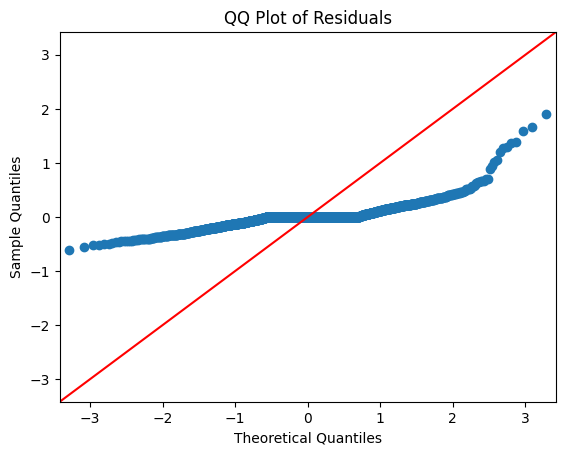

In [15]:
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot of Residuals')
plt.show()

The Q-Q plot checks if the residuals follow a normal distribution. The red line represents the ideal normal distribution; if the residuals are normally distributed, all points should fall close to this line.
Observation:

The residuals are close to the red line in the middle but deviate significantly at the ends, especially in the top right corner. This deviation suggests that the tails of the residual distribution are longer than expected (heavy tails), indicating possible outliers.
The residuals form a curved shape rather than aligning with the red line, indicating potential skewness or kurtosis issues. This further supports the finding from the residual distribution plot that the residuals do not fully meet the normality assumption.

Residual Distribution:

Residuals are concentrated around zero, indicating the model is very accurate in some cases, but errors are larger in others.
Normality Assumption:

The Q-Q plot shows that the normality assumption is not fully met, especially in the tails, indicating possible outliers or asymmetric distribution.
Model Applicability:

These plots suggest the model might have issues, such as not capturing certain data patterns or the presence of outliers. Further data cleaning or transformation (like removing outliers or standardizing data) might be needed.
Conclusion:

The residual analysis indicates the model is accurate in some cases, but overall, it does not fully meet the normality assumption, requiring further data checks or more complex modeling methods.